                                                                Project Overview

The purpose of this project is to examine the relationship between price level and CBI（Change in Private Inventories）for the entire U.S..  According to Federal Reserve, there is a positive relationship between the growth of GDP and CBI as CBI accounts for large fractions of changes in real GDP. In this project, we will use time series data of price level and CBI（Change in Private Inventories）for the U.S.. We will utilize linear regression analysis to test this theory.

Project Structure:

The project will first provide a data report. The data report will explain the origin of the data and method to access the data. The second part of the project will summarize statistic data about GDP and CBI（Change in Private Inventories）and visualize of these statistics to help further illustrate the project. The third part of the project will state a hypothesis and compared with trends in previous scholarship. This project will perform a linear regression to test the hypothesis with the statement of results. Finally, we will discuss the details of our results and compare it with former scholarship. 

Data Report:

The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides monthly data on the U.S. GDP (where we will commute the inflation rate), CBI, and from 1947 onward, and it identifies times of periods of economic contraction. The data can be accessed at https://fred.stlouisfed.org.

Key Variables: The four key variables are U.S. GDP, CBI (Change in Private Inventories), Net Exports of Goods and Services (NETEXP) and Federal Government: Current Expenditures(EXPND). FRED defines GDP as the following: “Gross domestic product (GDP), the featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.” The data presents the statement based on 50 states, the District of Columbia, and U.S. military installations, embassies, and consulates abroad. To calculate GDP, we will use expenditures approach to sum up goods and services sold to final users. The index measures price changes (from a predetermined reference date). In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted GDP, which removes the effects of seasonal changes, such as weather or holidays.

Inflation rate is defined as the percentage change in GDP from one period to the previous period: inflation=(GDP_t-GDP_t-1)/GDP_t-1.

FRED defines CBI as “the NIPA measure of the flow (or change) in the stock of inventories held by private business over a specified period”. 

FRED defines Net Exports of Goods and Services (NETEXP) as“Net exports of goods and services is the difference between U.S. exports of goods and services.”

FRED defines Federal Government Current Expenditure(EXPND) as "consumption expenditures, plus spending on social benefits and other transfers, interest payments, and subsidies to businesses". 


In [1]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [2]:
#Access Data
url = 'https://fred.stlouisfed.org/series/GDP/downloaddata/GDP.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [3]:
data.columns=['DATE','GDP']

In [4]:
data.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [5]:
#summary stats for GDP 
data.describe()

,GDP
count,295.000000
mean,6346.286566
std,6434.593464
min,243.164000
25%,739.757000
50%,3794.706000
75%,10841.079500
max,21747.394000


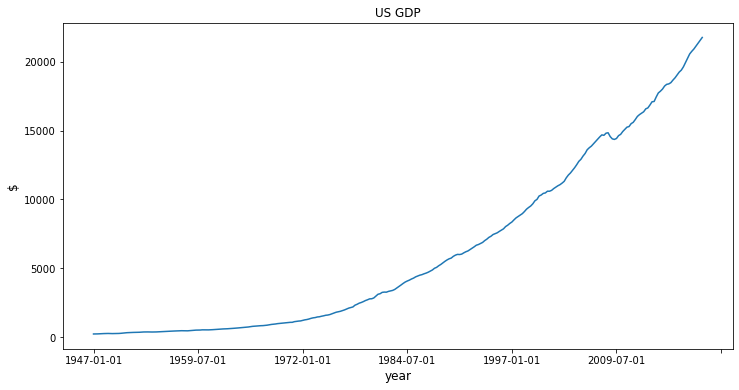

In [6]:
#Graphing the GDP 
data_d=data.set_index('DATE')
ax = data_d['1947':'2020'].plot(title='US GDP', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('$', fontsize=12)
plt.show()

In [7]:
data['DGDP']=data['GDP'].diff()
data.head()

,DATE,GDP,DGDP
0,1947-01-01,243.164,NaN
1,1947-04-01,245.968,2.804
2,1947-07-01,249.585,3.617
3,1947-10-01,259.745,10.160
4,1948-01-01,265.742,5.997


In [8]:
data['DGDP'][:-1]=data['DGDP'][1:]
data.head()

<ipython-input-8-b33220f03769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DGDP'][:-1]=data['DGDP'][1:]


,DATE,GDP,DGDP
0,1947-01-01,243.164,2.804
1,1947-04-01,245.968,3.617
2,1947-07-01,249.585,10.160
3,1947-10-01,259.745,5.997
4,1948-01-01,265.742,6.825


In [9]:
data['INFLATION']=data['DGDP']/data['GDP']
data.head()

,DATE,GDP,DGDP,INFLATION
0,1947-01-01,243.164,2.804,0.011531
1,1947-04-01,245.968,3.617,0.014705
2,1947-07-01,249.585,10.160,0.040708
3,1947-10-01,259.745,5.997,0.023088
4,1948-01-01,265.742,6.825,0.025683


In [10]:
#summary stats of infation 
data['INFLATION'].describe()

count    295.000000
mean       0.015606
std        0.013867
min       -0.094662
25%        0.009846
50%        0.014531
75%        0.021125
max        0.083863
Name: INFLATION, dtype: float64

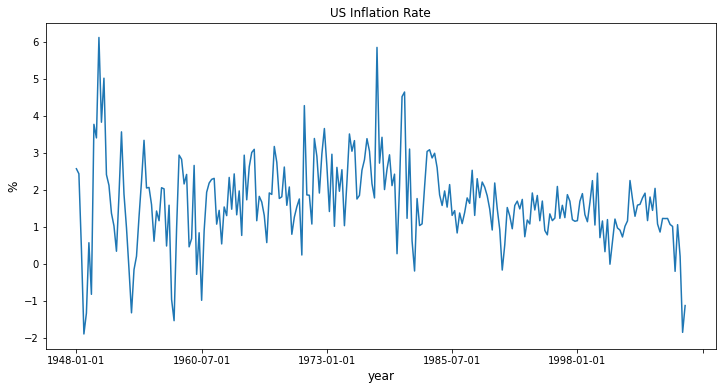

In [11]:
#Graphing for the inflation 
data1=data[['DATE','INFLATION']]
data1=data1.set_index('DATE')
data1['INFLATION']=data1['INFLATION']*100
ax = data1['1948':'2009'].plot(title='US Inflation Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [12]:
#Access Data
url_c = 'http://research.stlouisfed.org/fred2/series/FGEXPND/downloaddata/FGEXPND.csv'
data_c = pd.read_csv(url_c, parse_dates=True)
data_c.head()

,DATE,VALUE
0,1947-01-01,40.902
1,1947-04-01,40.346
2,1947-07-01,42.007
3,1947-10-01,38.149
4,1948-01-01,38.915


In [13]:
data_c.columns=['DATE', 'EXPND']
data_c.head()

,DATE,EXPND
0,1947-01-01,40.902
1,1947-04-01,40.346
2,1947-07-01,42.007
3,1947-10-01,38.149
4,1948-01-01,38.915


In [14]:
#Summary Statistics for EXPND
data_c.describe()

,EXPND
count,295.000000
mean,1393.626390
std,1512.424941
min,38.149000
25%,125.786000
50%,864.300000
75%,2110.616500
max,9107.088000


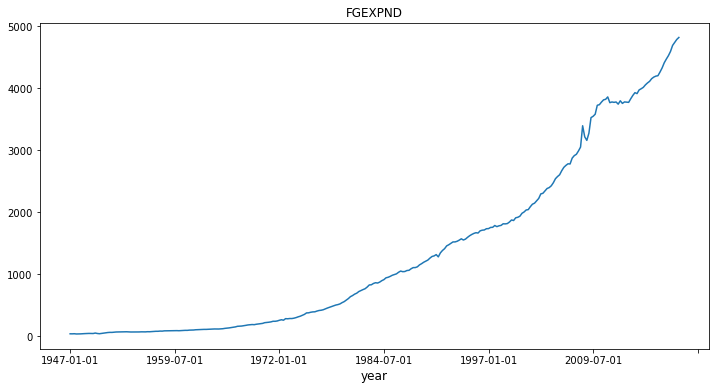

In [15]:
#Graphing FGEXPND
data_c1=data_c.set_index('DATE')
ax = data_c1['1947':'2020'].plot(title='FGEXPND', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [16]:
#Access Data
url_r = 'http://research.stlouisfed.org/fred2/series/NETEXP/downloaddata/NETEXP.csv'
data_x = pd.read_csv(url_r, parse_dates=True)
data_x.head()

,DATE,VALUE
0,1947-01-01,10.875
1,1947-04-01,11.294
2,1947-07-01,11.770
3,1947-10-01,9.289
4,1948-01-01,7.293


In [17]:
data_x.columns=['DATE', 'NETEXP']
data_x.head()

,DATE,NETEXP
0,1947-01-01,10.875
1,1947-04-01,11.294
2,1947-07-01,11.770
3,1947-10-01,9.289
4,1948-01-01,7.293


In [18]:
#Summary Statistics for NETEXP
data_x.describe()

,NETEXP
count,295.000000
mean,-180.459824
std,248.478900
min,-805.630000
25%,-393.433500
50%,-32.788000
75%,1.699500
max,21.582000


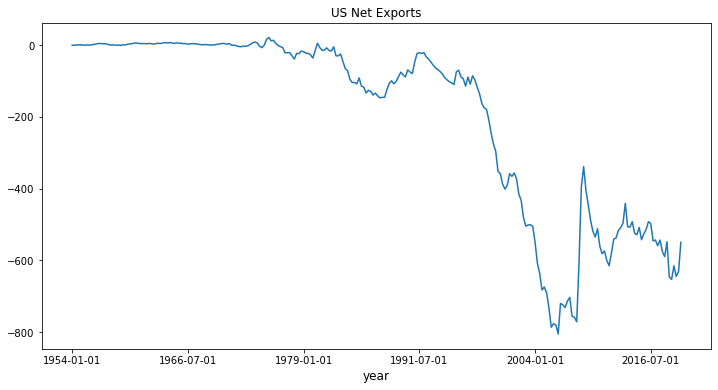

In [19]:
#Graphing Federal Net Exports
data_r1=data_x.set_index('DATE')
ax = data_r1['1954':'2020'].plot(title='US Net Exports', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [20]:
#Access Data
url_r = 'http://research.stlouisfed.org/fred2/series/CBI/downloaddata/CBI.csv'
data_r = pd.read_csv(url_r, parse_dates=True)
data_r.head()

,DATE,VALUE
0,1947-01-01,0.495
1,1947-04-01,-1.240
2,1947-07-01,-2.917
3,1947-10-01,1.456
4,1948-01-01,3.626


In [21]:
data_r.columns=['DATE', 'CBI']
data_r.head()

,DATE,CBI
0,1947-01-01,0.495
1,1947-04-01,-1.240
2,1947-07-01,-2.917
3,1947-10-01,1.456
4,1948-01-01,3.626


In [22]:
#Summary Statistics for NETEXP
data_r.describe()

,CBI
count,295.000000
mean,19.418766
std,44.312738
min,-298.356000
25%,3.028500
50%,11.326000
75%,34.242000
max,175.648000


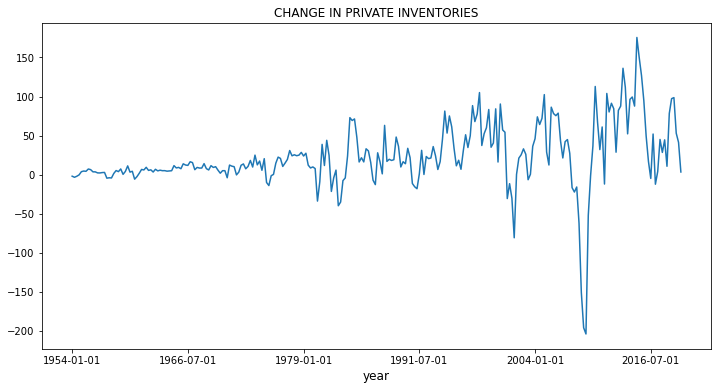

In [23]:
#Graphing Federal CHANGE IN PRIVATE INVENTORIES
data_r1=data_r.set_index('DATE')
ax = data_r1['1954':'2020'].plot(title='CHANGE IN PRIVATE INVENTORIES', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [24]:
data_merge=pd.merge(data, data_c, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [25]:
data_merge.head()

,DATE,GDP,DGDP,INFLATION,EXPND
0,1947-01-01,243.164,2.804,0.011531,40.902
1,1947-04-01,245.968,3.617,0.014705,40.346
2,1947-07-01,249.585,10.160,0.040708,42.007
3,1947-10-01,259.745,5.997,0.023088,38.149
4,1948-01-01,265.742,6.825,0.025683,38.915


In [26]:
data_merge=pd.merge(data_merge, data_r,how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [27]:
data_merge.head()

,DATE,GDP,DGDP,INFLATION,EXPND,CBI
0,1947-01-01,243.164,2.804,0.011531,40.902,0.495
1,1947-04-01,245.968,3.617,0.014705,40.346,-1.240
2,1947-07-01,249.585,10.160,0.040708,42.007,-2.917
3,1947-10-01,259.745,5.997,0.023088,38.149,1.456
4,1948-01-01,265.742,6.825,0.025683,38.915,3.626


In [28]:
data_merge=pd.merge(data_merge, data_x,how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [29]:
data_merge.head()

,DATE,GDP,DGDP,INFLATION,EXPND,CBI,NETEXP
0,1947-01-01,243.164,2.804,0.011531,40.902,0.495,10.875
1,1947-04-01,245.968,3.617,0.014705,40.346,-1.240,11.294
2,1947-07-01,249.585,10.160,0.040708,42.007,-2.917,11.770
3,1947-10-01,259.745,5.997,0.023088,38.149,1.456,9.289
4,1948-01-01,265.742,6.825,0.025683,38.915,3.626,7.293


In [30]:
data_merge.fillna(0)

,DATE,GDP,DGDP,INFLATION,EXPND,CBI,NETEXP
0,1947-01-01,243.164,2.804,0.011531,40.902,0.495,10.875
1,1947-04-01,245.968,3.617,0.014705,40.346,-1.240,11.294
2,1947-07-01,249.585,10.160,0.040708,42.007,-2.917,11.770
3,1947-10-01,259.745,5.997,0.023088,38.149,1.456,9.289
4,1948-01-01,265.742,6.825,0.025683,38.915,3.626,7.293
...,...,...,...,...,...,...,...
290,2019-07-01,21540.325,207.069,0.009613,4786.422,41.316,-631.838
291,2019-10-01,21747.394,-186.255,-0.008564,4818.582,3.406,-549.757
292,2020-01-01,21561.139,-2041.025,-0.094662,4903.851,-52.117,-494.307
293,2020-04-01,19520.114,1637.008,0.083863,9107.088,-298.356,-545.164


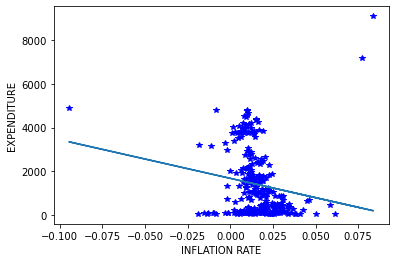

In [31]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge['INFLATION'],data_merge['EXPND'],'b*')
ax.set_xlabel("INFLATION RATE")
ax.set_ylabel("EXPENDITURE")
b,m=polyfit(data_merge['INFLATION'],data_merge['EXPND'],1)
ax.plot(data_merge['INFLATION'],b+m*data_merge['INFLATION'],'-')

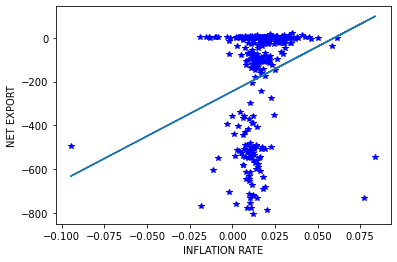

In [32]:
fig,ax=plt.subplots()
ax.plot(data_merge['INFLATION'],data_merge['NETEXP'],'b*')
ax.set_xlabel("INFLATION RATE")
ax.set_ylabel("NET EXPORT")
b,m=polyfit(data_merge['INFLATION'],data_merge['NETEXP'],1)
ax.plot(data_merge['INFLATION'],b+m*data_merge['INFLATION'],'-')

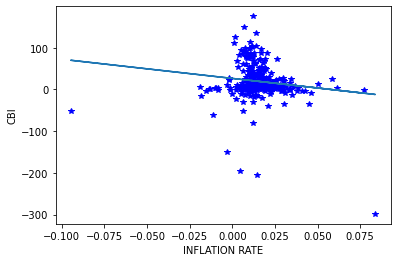

In [33]:
fig,ax=plt.subplots()
ax.plot(data_merge['INFLATION'],data_merge['CBI'],'b*')
ax.set_xlabel("INFLATION RATE")
ax.set_ylabel("CBI")
b,m=polyfit(data_merge['INFLATION'],data_merge['CBI'],1)
ax.plot(data_merge['INFLATION'],b+m*data_merge['INFLATION'],'-')

Regression Analysis Part 1:

We will use the regression analysis to test our hypothesis. According to economic theory, there is a trade off between CBI and inflation rate which means that there will be a negative relationship between these two variables. We will use linear regression analysis to test this hypothesis.

In [34]:
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['INFLATION'], data_merge['CBI'])
gradient, intercept, std_err, p_value

(-459.3777207531695,
 26.587771379605904,
 184.74378638392983,
 0.01345512172501551)

Discussion: 


According to the above linear regression result, the slope coefficient on the regression of Change in Private Inventories on Inflation Rate is negative. However, it is significant at a 5% level. Therefore, this result does not support a negative relationship between Change in Private Inventories and Inflation Rate. Therefore, the original hypothesis is supported. 
Even if our hypothesis is supported,we may need still omitted variables since the magnitude of our parameter is large.There are potentially other variables that impact inflation, personal consumption and net exports, other components of GDP. Without controlling for these variables, our linear regression result could possibly be biased and inconsistent. 

Regression Analysis Part 2:
In this linear regression analysis, we will include two omitted variables that correlate with infation which are the Federal Government: Current Expenditures and Net Exports of Goods and Services.As inflation rates increases, Federal Government: Current Expenditures decreases; in contrary, according to ecnomic theory, as inflaiton goes up, price level will go up. aggregate demand increases with extension to aggregate supply, real GDP increases, thus increases government expenditure.However, in our analysis, we fail to find out other factors that result in an negative relationship between inflation and government expenditure. 

On the other side, as inflation increases, Net Exports of Goods and Services increaes. As inflation brings sustained increase in the general price level, interest rates rises, domestic investment in foreign countries decreases, net exports increases, resulting in a positive relationship between inflation and net exports. 
Moreover, since p_value is significant at 5% significance level for Federal Government: Current Expenditures, we reject hypothesis that there is no relationship between inflation and Federal Government: Current Expenditures. Since p_value is not significant 5% level for Net Exports of Goods and Services, we cannot reject hypothesis that there is no relationship between inflation and Net Exports of Goods and Services. 
Because of these reasons, we conlude Federal Government: Current Expenditures is omitted variable but we cannot conclude that Net Exports of Goods and Services is omitted variable from the first part of the regression analysis. However, we need more research to find out the factors that result a negative relationship between inflation and government expenditure, rather than a positive one.  

In [47]:
#Test for the relationship between EXPND and inflation
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['INFLATION'], data_merge['EXPND'])
gradient, intercept, std_err, p_value

(-17716.057913152967,
 1670.1015146470486,
 6286.996789335337,
 0.00516289725182552)

Discussion:
We see a negative coefficient which confirms that as the inflation increases, Federal Government: Current Expenditures decreases.  

In [48]:
#Test for the relationship between NETEXP and inflation
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['INFLATION'], data_merge['NETEXP'])
gradient, intercept, std_err, p_value

(4099.118168919251,
 -244.43027431919552,
 1019.044439833745,
 7.333155211542808e-05)

Discussion:
We see a positive coefficient which confirms that as the inflation increases, Net Export increases. 

In [42]:
#Regression of CBI on inflation rate, net export and expenditure.
data_merge['const'] = 1
reg1 = sm.OLS(endog=data_merge['INFLATION'], exog=data_merge[['const', 'CBI','NETEXP','EXPND']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [43]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              INFLATION   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     6.662
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           0.000230
Time:                        21:52:17   Log-Likelihood:                 853.79
No. Observations:                 295   AIC:                            -1700.
Df Residuals:                     291   BIC:                            -1685.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.001     15.801      0.0

The above result show that adding NETEXP and EXPND variable decreases the magnitude of the parameter in front of the CBI variable, this shows that including the omitted variable help to correct possible bias and inconsistency in the first regression analysis. However, we still have positive coefficient that is not significant, this means that further research needs to be established. 